In [1]:
using Plots, LinearAlgebra, Statistics, Distributions, StatsBase, DataFrames

# Definicja parametrów zgodna z treścią zadania

In [5]:
#Liczba agentów rodzaju I
Nᴵ = 5000
#Liczba agentów rodzaju II
Nᴵᴵ = 25000
#Liczba agentów rodzaju III
Nᴵᴵᴵ = 50000  #SUMA 80000 (8*10^4)
#Ceny

P_górna⁽¹⁾= 35000
P_górna⁽²⁾= 25000
P_dolna⁽¹⁾= 23000
P_górna⁽³⁾=19000
P_dolna⁽²⁾= 18000
P_dolna⁽³⁾= 8000;

#PRZESKALOWANIE CEN (I DOCHODÓW) - INACZEJ FUNKCJA rand() NIE RADZI SOBIE Z OBCIĘCIEM ROZKŁADU
P_górna⁽¹⁾= P_górna⁽¹⁾/1000
P_górna⁽²⁾= P_górna⁽²⁾/1000
P_dolna⁽¹⁾= P_dolna⁽¹⁾/1000
P_górna⁽³⁾= P_górna⁽³⁾/1000
P_dolna⁽²⁾= P_dolna⁽²⁾/1000
P_dolna⁽³⁾= P_dolna⁽³⁾/1000;


T = 12*20 #12 miesięcy - rok, 20 lat
CZAS = 15*12 #Piętnastoletnie ,,pożyczki" - zablokowanie czasu do szukania nowego mieszkania (można szukać tylko gdy CZASₙ = 0);
#Początkowe rozmieszczenie - przestrzenie trzech dzielnic: ciągłe
α₁ = 1 #Współczynnik kształtu - im większy tym ,,chudszy" ogon rozkładu PAreta
θ₁ = 0.1 #Skala - dla rozkładów Pareta x > θ (śmieszny błąd Julii - to co jest przed nawiasem to ,,vartheta", ale w komentarzach pojawia się również gdy wpiszemy \theta+TAB)
α₂ = 2
θ₂ = 0.1
α₃ = 5
θ₃ = 0.1

Pocz_rozk_I = Pareto(α₁, θ₁)
Pocz_rozk_II = Pareto(α₂, θ₂)
Pocz_rozk_III = Pareto(α₃, θ₃)

Pareto{Float64}(α=5.0, θ=0.1)

# Wyniki symulacji dla modelu

In [10]:
n_simulations = 3 #liczba symulacji
results = zeros(Float32, n_simulations, Nᴵ+Nᴵᴵ+Nᴵᴵᴵ, 5, T) #wyniki (Float 32 zamiast Float64 --> mniejsza liczba bitów
#Wymiary - liczba symulacji, liczba agentów w dzielnicach, liczba parametrów agentów, czas obserwacji (240 miesięcy)
#results

3×80000×5×240 Array{Float32, 4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 2, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 3, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 4, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.

In [4]:
@time for sim in 1:n_simulations
    print("Symulacja $sim", " ") #żeby śledzić proces symulacji
    
    AGENCI = zeros(Float32, Nᴵ+Nᴵᴵ+Nᴵᴵᴵ,5,T) #oczyszczenie stanu AGENCI dla nowej symulacji
    #[INDEKS AGENTA, [DZIELNICA,DOCHÓD,PIERWSZA WSPÓŁRZĘDNA,DRUGA WSPÓŁRZĘDNA,CZAS TRWANIA DŁUGU],T]
    #Inicjalizacja dzielnic
    #Dzielnica I
    for n in 1:Nᴵ
         while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽¹⁾ || AGENCI[n,2,1] < P_dolna⁽¹⁾ #przy zerowym dochodzie albo dochodu spoza przedzialow dzielnicy 1
            AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽¹⁾*5 #losujemy dochod poczatkowy z rozkladu Pareta
        end
        AGENCI[n,1,1:2] .= 1 #dzielnica 1
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] #cena mieszkania (pierwsz wspolrzedna) = wylosowany dochod
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1)) #druga wspolrzedna jest losowana z rozkladu jednostajnego
    end


    for n in Nᴵ+1:Nᴵ+Nᴵᴵ
        while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽²⁾ || AGENCI[n,2,1] < P_dolna⁽²⁾
            AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽²⁾*5
        end
        AGENCI[n,1,1:2] .= 2
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
    end

    for n in Nᴵ+Nᴵᴵ+1:Nᴵ+Nᴵᴵ+Nᴵᴵᴵ
        while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽³⁾ || AGENCI[n,2,1] < P_dolna⁽³⁾
            AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽³⁾*5
        end
        AGENCI[n,1,1:2] .= 3
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
    end
    #ILU AGENTÓW MA POCZĄTKOWO NIEZEROWY DŁUG (SPŁATY POZA MODELEM)? - Początkowy dług
    Nᵖᵒᶜᶻᵈᵍ = 15000
    X = rand(1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ,Nᵖᵒᶜᶻᵈᵍ)
    for m in 1:Nᵖᵒᶜᶻᵈᵍ
        AGENCI[X[m],5,1] =  rand(1:CZAS) #LOSOWA ZAPADALNOŚĆ DŁUGU - TUTAJ JEST TO LICZBA MIESIĘCY OD ZACIĄGNIĘCIA
        if AGENCI[X[m],5,1] == CZAS
            AGENCI[X[m],5,2] = 0
        else
            AGENCI[X[m],5,2] = AGENCI[X[m],5,1] + 1
        end
    end

    #symulacja w czasie
    for t in 2:T-1 #12*20
        #WZROST/WAHANIA CEN?
        for n in 1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ #liczba mieszkancow
            if AGENCI[n,1,t] == 3 #jesli dzielnica 3
                przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾ #losujemy zmiane dochodu
                while przyrost > P_górna⁽³⁾ #dopoki nie przejdzie prog gorny
                    przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost #aktualizacja dochodu
                if AGENCI[n,2,t] > AGENCI[n,2,t-1] && AGENCI[n,5,t] == 0 #jezeli dochod wzrosl i nastapil czas (minal okres splat dlugu)
                    #print("tu1")
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    if AGENCI[n,3,t] < P_dolna⁽²⁾ #jesli cena mieszkania ponizej drugiego progu dolnego
                        #println("tu2")
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽³⁾, upper=P_górna⁽³⁾)) #w tej samej dzielnicy 3
                        AGENCI[n,1,t+1] = 3 #w przyszlym okresie zostaje dzielnica 3
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba #cena mieszkania jest wyzsza od aktualnego dochodu ORAZ agent nie przenosi się do miejsca, gdzie poziom dochodów jest wyższy niż to, na co go stać 
                            AGENCI[n,3,t+1] = próba #aktualizacja ceny mieszkania (wsporzednej)
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1)) #losujemy
                            AGENCI[n,5,t+1] = 1 #1. okres dlugu
                        else #gorsze mieszkanie albo nie stać
                            AGENCI[n,3,t+1] = AGENCI[n,3,t] #zostaje jak jest 
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    else #jesli dochod powyzej drugiego progu dolnego 
                        #println("tu3")
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽²⁾, upper=P_górna⁽³⁾)) #miedzy dolnym 2 a gornym 3
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 2 #zmiana dzielnicy
                            AGENCI[n,3,t+1] = próba #nowa cena mieszkania
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1)) #nowa losowa lokalizacja
                            AGENCI[n,5,t+1] = 1 #1. okres dlugu
                        else #gorsze mieszkanie albo nie stać
                            AGENCI[n,1,t+1] = 3 #linijka 37 poprawiona, zostaje w tej samej dzielnicy
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    end
                else #w porownaniu do poprzedniego okresu dochod NIE wzrosl albo nie splacony dlug
                    #println("tu4")
                    AGENCI[n,1,t+1] = 3 #zostaje w dzielnicy 3
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS #jezeli nie splaca dlugu to czeka na kolejne losowanie
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1 #czeka az splaci
                    end
                end
           
            elseif AGENCI[n,1,t] == 2 #dla dzielnicy 2 to samo
                przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾
                while przyrost > P_górna⁽²⁾
                    przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                if AGENCI[n,2,t] > AGENCI[n,2,t-1]  && AGENCI[n,5,t] == 0
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    if AGENCI[n,3,t] < P_dolna⁽¹⁾ #linijka jest poprawiona
                        #print("tu5")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽²⁾, upper=P_górna⁽²⁾))
                        AGENCI[n,1,t+1] = 2
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    else
                        #print("tu6")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽¹⁾, upper=P_górna⁽²⁾))
                         if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 1
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,1,t+1] = 2
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    end
                else
                    #print("tu7")
                    AGENCI[n,1,t+1] = 2 #linijka 94 poprawiona
                    AGENCI[n,3,t+1] = AGENCI[n,3,t] 
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            else #dla dzielnicy 1

                AGENCI[n,2,t] = AGENCI[n,2,t] + 0.1*rand(Pocz_rozk_I) #zmniejszenie tempa zmian dochodu (opoznienie modelu), można skasować
                if AGENCI[n,2,t] > AGENCI[n,2,t-1]  && AGENCI[n,5,t] == 0
                    przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾
                    while przyrost > P_górna⁽²⁾
                        przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾
                    end
                    AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                    #print("tu8")
                    #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                    if AGENCI[n,3,t] < próba && AGENCI[n,2,t] > próba
                        próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = próba
                        AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                        AGENCI[n,5,t+1] = 1
                    else
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = AGENCI[n,3,t]
                        AGENCI[n,4,t+1] = AGENCI[n,4,t]
                        AGENCI[n,5,t+1] = 0
                    end
                else
                    #print("tu9")
                    AGENCI[n,1,t+1] = 1
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
                
            end 
        end
    end
    results[sim, :, :, :] = AGENCI  #zachowanie wyników
end

Symulacja 1 Symulacja 2 Symulacja 3 Symulacja 4 Symulacja 5 Symulacja 6 Symulacja 7 Symulacja 8 Symulacja 9 Symulacja 10 Symulacja 11 Symulacja 12 Symulacja 13 Symulacja 14 Symulacja 15 Symulacja 16 Symulacja 17 Symulacja 18 Symulacja 19 Symulacja 20 Symulacja 21 Symulacja 22 Symulacja 23 Symulacja 24 Symulacja 25 Symulacja 26 Symulacja 27 Symulacja 28 Symulacja 29 Symulacja 30 Symulacja 31 Symulacja 32 Symulacja 33 Symulacja 34 Symulacja 35 Symulacja 36 Symulacja 37 Symulacja 38 Symulacja 39 Symulacja 40 Symulacja 41 Symulacja 42 Symulacja 43 Symulacja 44 Symulacja 45 Symulacja 46 Symulacja 47 Symulacja 48 Symulacja 49 Symulacja 50 Symulacja 51 Symulacja 52 Symulacja 53 Symulacja 54 Symulacja 55 Symulacja 56 Symulacja 57 Symulacja 58 Symulacja 59 Symulacja 60 Symulacja 61 Symulacja 62 Symulacja 63 Symulacja 64 Symulacja 65 Symulacja 66 Symulacja 67 Symulacja 68 Symulacja 69 Symulacja 70 Symulacja 71 Symulacja 72 Symulacja 73 Symulacja 74 Symulacja 75 Symulacja 76 Symulacja 77 Symulacj

In [5]:
results

100×80000×5×240 Array{Float32, 4}:
[:, :, 1, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1.0  1.0  1.0

## Sprawdzenie poprawności procesu dla losowych symulacji

In [6]:
indeksy = findall(x -> x == 0, results[rand(1:n_simulations),:,1,42])
println("Czy wszyscy agenci mają przypisaną dzielnicę w t=42? ",isempty(indeksy))

Czy wszyscy agenci mają przypisaną dzielnicę w t=42? true


In [7]:
num_entries = sum(results[rand(1:n_simulations),n,1,2] == 1 for n in 1:size(results, 2)) #liczba agentow, ktorzy spelniaja warunek, tj. znajdują się w dzielnicy 1 w czasie t=2

5000

In [8]:
num_entries = sum(results[rand(1:n_simulations),n,1,42] == 1 for n in 1:size(results, 2))

7583

In [9]:
num_entries = sum(results[rand(1:n_simulations),n,1,100] == 1 for n in 1:size(results, 2))

7847

Dzielnica 2 (symulacje są wybierane losowo dla każdego przedziału w czasie - służy to odpowiedzią czy wszystkie symulacje mają mniej więcej podobne zachowanie). Okres 2, 42 i 100 - liczba w dzielnicy 2 spada, a w dzielnicy 1 rośnie.

In [10]:
num_entries = sum(results[rand(1:n_simulations),n,1,2] == 2 for n in 1:size(results, 2))

25000

In [11]:
num_entries = sum(results[rand(1:n_simulations),n,1,42] == 2 for n in 1:size(results, 2))

22715

In [12]:
num_entries = sum(results[rand(1:n_simulations),n,1,100] == 2 for n in 1:size(results, 2))

22662

## Symulacja parametrów modelu

In [13]:
n_sim = size(results, 1) #liczba symulacji

100

In [14]:
n_agent = size(results, 2) #liczba agentów (populacja ogółem)

80000

In [15]:
n_time = size(results, 4) #jednostki czasu

240

In [16]:
results[rand(1:n_sim), rand(1:n_agent), [1,2,3], rand(1:n_time)] #losowa dzielnica w jakims momencie w czasie i dochód losowego agenta 

3-element Vector{Float32}:
  3.0
 21.511398
 11.9622965

In [2]:
function analyze_avg_agents(results) #Funkcja do kalkulacji średniej liczby agentów
    n_sim, _, _, n_time = size(results)
    avg_agents_per_district_and_time = zeros(3, n_time) #średnia w czasie dla każdej z trzech dzienic
    median_agents_per_district_and_time = zeros(3, n_time) #mediana
    agents_5p_min = zeros(3, n_time) #5. percentyl
    agents_5p_max = zeros(3, n_time) #95. percentyl
    for t in 1:n_time #dla każdego okresu
        district_counts_by_simulation = zeros(n_sim, 3)
        for sim in 1:n_sim #dla każdej symulacji
            districts = Int.(results[sim, :, 1, t])
            district_counts = countmap(districts) #policz ile razy jest dzielnica
            for district in keys(district_counts)
                district_counts_by_simulation[sim, district] = district_counts[district]
            end
        end
        avg_agents_per_district_and_time[:, t] = mean(district_counts_by_simulation, dims=1)
        median_agents_per_district_and_time[:, t] = median(district_counts_by_simulation, dims=1)
        for district in 1:3
            district_values = district_counts_by_simulation[:, district]
            agents_5p_min[district, t] = quantile(district_values, 0.05)
            agents_5p_max[district, t] = quantile(district_values, 0.95)
        end
    end
    return avg_agents_per_district_and_time, median_agents_per_district_and_time, agents_5p_min, agents_5p_max
end

analyze_avg_agents (generic function with 1 method)

In [18]:
avg_agents_per_district_and_time, median_agents_per_district_and_time, agents_5p_min, agents_5p_max = analyze_avg_agents(results)

([5000.0 5000.0 … 13683.22 13692.12; 25000.0 25000.0 … 18011.16 18009.91; 50000.0 50000.0 … 48305.62 48297.97], [5000.0 5000.0 … 13678.0 13686.5; 25000.0 25000.0 … 18006.0 18008.5; 50000.0 50000.0 … 48307.5 48300.0], [5000.0 5000.0 … 13565.95 13576.7; 25000.0 25000.0 … 17852.8 17850.75; 50000.0 50000.0 … 48234.9 48228.950000000004], [5000.0 5000.0 … 13834.2 13844.3; 25000.0 25000.0 … 18159.5 18153.550000000003; 50000.0 50000.0 … 48366.0 48359.0])

In [19]:
agents_5p_min

3×240 Matrix{Float64}:
  5000.0   5000.0   6281.95   6698.9  …  13552.0  13557.0  13566.0  13576.7
 25000.0  25000.0  23807.0   23432.7     17857.6  17856.4  17852.8  17850.8
 50000.0  50000.0  49764.8   49692.0     48250.0  48241.9  48234.9  48229.0

In [20]:
avg_agents_per_district_and_time

3×240 Matrix{Float64}:
  5000.0   5000.0   6344.17   6774.08  …  13664.2  13673.5  13683.2  13692.1
 25000.0  25000.0  23864.3   23504.5      18013.8  18012.5  18011.2  18009.9
 50000.0  50000.0  49791.5   49721.4      48322.0  48313.9  48305.6  48298.0

In [21]:
median_agents_per_district_and_time

3×240 Matrix{Float64}:
  5000.0   5000.0   6345.0   6780.0  …  13660.0  13670.0  13678.0  13686.5
 25000.0  25000.0  23861.0  23504.5     18009.0  18007.0  18006.0  18008.5
 50000.0  50000.0  49790.0  49722.0     48322.0  48314.5  48307.5  48300.0

In [22]:
agents_5p_max

3×240 Matrix{Float64}:
  5000.0   5000.0   6399.35   6833.0  …  13812.1  13823.1  13834.2  13844.3
 25000.0  25000.0  23927.5   23584.2     18158.4  18160.2  18159.5  18153.6
 50000.0  50000.0  49820.0   49753.2     48375.3  48372.2  48366.0  48359.0

In [3]:
function plot_by_district_agents(avg_agents_per_district_and_time, median_agents_per_district_and_time, agents_5p_min, agents_5p_max)
    n_time = size(avg_agents_per_district_and_time, 2)

    p = plot(layout = (3, 1), titlefontsize=10, xlabel="Czas (miesiące)", ylabel="Agenci", left_margin=6Plots.mm, legend=:outertopleft)

    plot!(p[1], 1:n_time, avg_agents_per_district_and_time[1, :], color=:blue, linestyle=:solid, label="średnia")
    plot!(p[1], 1:n_time, median_agents_per_district_and_time[1, :], color=:green, linestyle=:solid, label="mediana")
    plot!(p[1], 1:n_time, agents_5p_min[1, :], color=:black, linestyle=:dash, label="5_min_p")
    plot!(p[1], 1:n_time, agents_5p_max[1, :], color=:black, linestyle=:dash, label="5_max_p")

    plot!(p[2], 1:n_time, avg_agents_per_district_and_time[2, :], color=:blue, linestyle=:solid, label="średnia")
    plot!(p[2], 1:n_time, median_agents_per_district_and_time[2, :], color=:green, linestyle=:solid, label="mediana")
    plot!(p[2], 1:n_time, agents_5p_min[2, :], color=:black, linestyle=:dash, label="5_min_p")
    plot!(p[2], 1:n_time, agents_5p_max[2, :], color=:black, linestyle=:dash, label="5_max_p")

    plot!(p[3], 1:n_time, avg_agents_per_district_and_time[3, :], color=:blue, linestyle=:solid, label="średnia")
    plot!(p[3], 1:n_time, median_agents_per_district_and_time[3, :], color=:green, linestyle=:solid, label="mediana")
    plot!(p[3], 1:n_time, agents_5p_min[3, :], color=:black, linestyle=:dash, label="5_min_p")
    plot!(p[3], 1:n_time, agents_5p_max[3, :], color=:black, linestyle=:dash, label="5_max_p")

    p
end

plot_by_district_agents (generic function with 1 method)

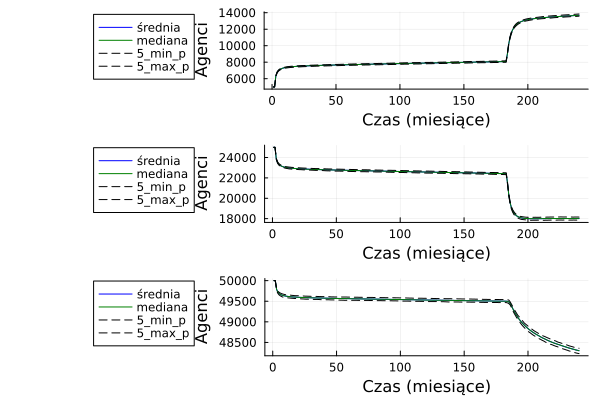

In [24]:
plot_by_district_agents(avg_agents_per_district_and_time, median_agents_per_district_and_time, agents_5p_min, agents_5p_max)

In [4]:
function plot_avg_agent_by_district(avg_agents_per_district_and_time)  
    n_time = size(avg_agents_per_district_and_time, 2)
    p = plot(title = "Średnia liczba agentów w dzielnicach w czasie dla 50 symulacji", titlefontsize =10,xlabel="Czas (miesiące)", ylim=(0,60000),ylabel="Średnia liczba agentów", legend=:topright,  size=(800, 600))
    plot!(p,1:n_time,avg_agents_per_district_and_time[1,:], label="Dzielnica 1")
    plot!(p,1:n_time,avg_agents_per_district_and_time[2,:], label="Dzielnica 2")
    plot!(p,1:n_time,avg_agents_per_district_and_time[3,:], label="Dzielnica 3")
    p
end

plot_avg_agent_by_district (generic function with 1 method)

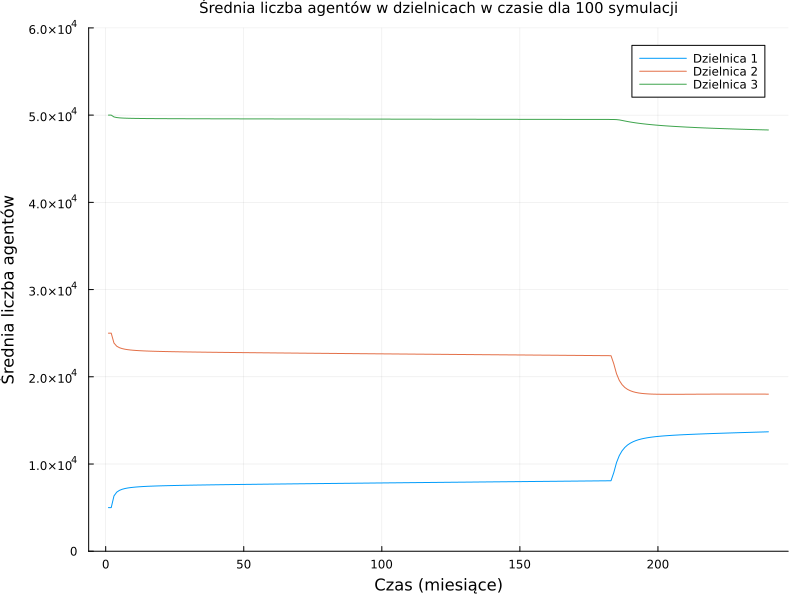

In [26]:
plot_avg_agent_by_district(avg_agents_per_district_and_time)  

In [5]:
function analyze_income_and_house_prices(results)
    n_sim, _, _, n_time = size(results)
    
    avg_income_per_district_and_time = zeros(3, n_time)
    median_income_per_district_and_time = zeros(3, n_time)
    income_5p_min = zeros(3, n_time)
    income_5p_max = zeros(3, n_time)
    
    avg_house_price_per_district_and_time = zeros(3, n_time)
    median_house_price_per_district_and_time = zeros(3, n_time)
    house_price_5p_min = zeros(3, n_time)
    house_price_5p_max = zeros(3, n_time)
    
    for t in 1:n_time
        income_by_simulation = zeros(n_sim, 3)
        house_price_by_simulation = zeros(n_sim, 3)
        
        for sim in 1:n_sim  
            districts = Int.(results[sim, :, 1, t]) 
            incomes = results[sim, :, 2, t]  
            house_prices = results[sim, :, 3, t]  
            
            # Collect statistics for each district
            for district in 1:3
                # Select agents in the current district
                district_mask = districts .== district
                
                # Collect income and house prices for agents in the district
                district_incomes = incomes[district_mask]
                district_house_prices = house_prices[district_mask]
                
                # Calculate mean income and house price for this district and simulation
                income_by_simulation[sim, district] = mean(district_incomes)
                house_price_by_simulation[sim, district] = mean(district_house_prices)
            end
        end
        
        # Calculate mean, median, 5th and 95th percentiles for income
        avg_income_per_district_and_time[:, t] .= vec(mean(income_by_simulation, dims=1))  # Convert to vector
        median_income_per_district_and_time[:, t] .= vec(median(income_by_simulation, dims=1))  # Convert to vector
        for district in 1:3
            district_incomes = income_by_simulation[:, district]
            income_5p_min[district, t] = quantile(district_incomes, 0.05)
            income_5p_max[district, t] = quantile(district_incomes, 0.95)
        end
        
        # Calculate mean, median, 5th and 95th percentiles for house price
        avg_house_price_per_district_and_time[:, t] .= vec(mean(house_price_by_simulation, dims=1))  # Convert to vector
        median_house_price_per_district_and_time[:, t] .= vec(median(house_price_by_simulation, dims=1))  # Convert to vector
        for district in 1:3
            district_house_prices = house_price_by_simulation[:, district]
            house_price_5p_min[district, t] = quantile(district_house_prices, 0.05)
            house_price_5p_max[district, t] = quantile(district_house_prices, 0.95)
        end
    end
    
    return avg_income_per_district_and_time, median_income_per_district_and_time, income_5p_min, income_5p_max,
    avg_house_price_per_district_and_time, median_house_price_per_district_and_time, house_price_5p_min, house_price_5p_max
end

analyze_income_and_house_prices (generic function with 1 method)

In [28]:
avg_income_per_district_and_time, median_income_per_district_and_time, income_5p_min, income_5p_max,
    avg_house_price_per_district_and_time, median_house_price_per_district_and_time, house_price_5p_min, house_price_5p_max = analyze_income_and_house_prices(results)

([26.65642541885376 0.09604739107191562 … 1.7333197748661042 0.0; 20.40044584274292 24.945883483886718 … 1070.8246032714844 0.0; 11.492800331115722 13.867670259475709 … 576.557470703125 0.0], [26.65333366394043 0.09263543412089348 … 1.7280976176261902 0.0; 20.400798797607422 24.94369602203369 … 1070.8369750976562 0.0; 11.492413520812988 13.867245197296143 … 576.5541381835938 0.0], [26.596133041381837 0.07378906458616256 … 1.6603509008884432 0.0; 20.38074140548706 24.913166427612303 … 1069.2430847167968 0.0; 11.47798204421997 13.851343059539795 … 576.4886169433594 0.0], [26.724543571472168 0.12820472195744506 … 1.8046835362911224 0.0; 20.41870822906494 24.98251733779907 … 1072.21181640625 0.0; 11.508618688583374 13.884803104400634 … 576.6324188232422 0.0], [26.65642541885376 26.65642541885376 … 25.252282791137695 25.251846961975097; 20.40044584274292 20.40044584274292 … 22.39664743423462 22.39561912536621; 11.492800331115722 11.492800331115722 … 14.422939748764039 14.426783590316772], [

In [29]:
avg_income_per_district_and_time

3×240 Matrix{Float64}:
 26.6564   0.0960474   2.88447   1.86692  …     1.732     1.73332  0.0
 20.4004  24.9459     29.274    33.7283      1066.52   1070.82     0.0
 11.4928  13.8677     16.2136   18.5787       574.183   576.557    0.0

In [30]:
avg_house_price_per_district_and_time

3×240 Matrix{Float64}:
 26.6564  26.6564  26.153   26.0449  …  25.2532  25.2528  25.2523  25.2518
 20.4004  20.4004  20.8775  21.3336     22.399   22.3978  22.3966  22.3956
 11.4928  11.4928  11.5748  11.7567     14.415   14.4191  14.4229  14.4268

In [6]:
function plot_by_district_income(avg_income_per_district_and_time, median_income_per_district_and_time, income_5p_min, income_5p_max)
    n_time = size(avg_income_per_district_and_time, 2)

    p = plot(layout = (3, 1), titlefontsize=10, xlabel="Czas (miesiące)", ylabel="Dochód", left_margin=6Plots.mm, legend=:outertopleft)

    plot!(p[1], 1:n_time, avg_income_per_district_and_time[1, :], color=:blue, linestyle=:solid, label="średnia")
    plot!(p[1], 1:n_time, median_income_per_district_and_time[1, :], color=:green, linestyle=:solid, label="mediana")
    plot!(p[1], 1:n_time, income_5p_min[1, :], color=:black, linestyle=:dash, label="5_min_p")
    plot!(p[1], 1:n_time, income_5p_max[1, :], color=:black, linestyle=:dash, label="5_max_p")

    plot!(p[2], 1:n_time, avg_income_per_district_and_time[2, :], color=:blue, linestyle=:solid, label="średnia")
    plot!(p[2], 1:n_time, median_income_per_district_and_time[2, :], color=:green, linestyle=:solid, label="mediana")
    plot!(p[2], 1:n_time, income_5p_min[2, :], color=:black, linestyle=:dash, label="5_min_p")
    plot!(p[2], 1:n_time, income_5p_max[2, :], color=:black, linestyle=:dash, label="5_max_p")

    plot!(p[3], 1:n_time, avg_income_per_district_and_time[3, :], color=:blue, linestyle=:solid, label="średnia")
    plot!(p[3], 1:n_time, median_income_per_district_and_time[3, :], color=:green, linestyle=:solid, label="mediana")
    plot!(p[3], 1:n_time, income_5p_min[3, :], color=:black, linestyle=:dash, label="5_min_p")
    plot!(p[3], 1:n_time, income_5p_max[3, :], color=:black, linestyle=:dash, label="5_max_p")

    p
end

plot_by_district_income (generic function with 1 method)

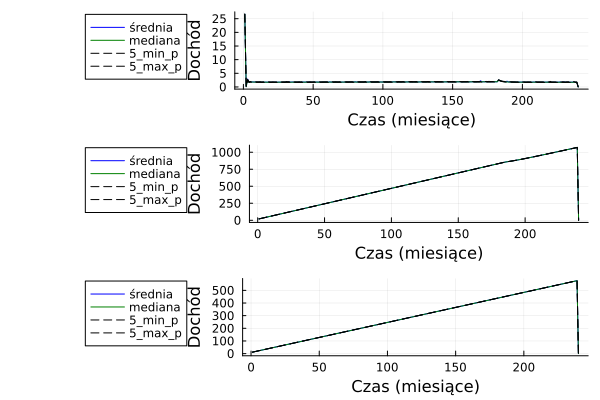

In [32]:
plot_by_district_income(avg_income_per_district_and_time, median_income_per_district_and_time, income_5p_min, income_5p_max)

In [7]:
function plot_by_district_income(avg_income_per_district_and_time)
    n_time = size(avg_agents_per_district_and_time, 2)
    p = plot(title = "Dochód w dzielnicach w czasie dla 50 symulacji", titlefontsize =10,xlabel="Czas (miesiące)",ylabel="Średni dochód", legend=:topright,  size=(800, 600))
    plot!(p,1:n_time,avg_income_per_district_and_time[1,:], label="Dzielnica 1")
    plot!(p,1:n_time,avg_income_per_district_and_time[2,:], label="Dzielnica 2")
    plot!(p,1:n_time,avg_income_per_district_and_time[3,:], label="Dzielnica 3")
    p
end

plot_by_district_income (generic function with 2 methods)

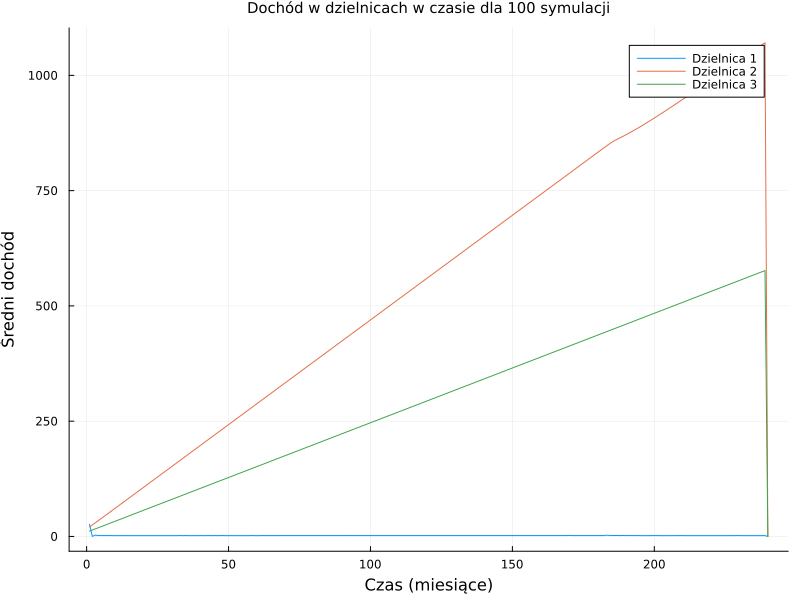

In [34]:
plot_by_district_income(avg_income_per_district_and_time)

In [8]:
function plot_by_district_price(avg_house_price_per_district_and_time, median_house_price_per_district_and_time, house_price_5p_min, house_price_5p_max)
    n_time = size(avg_house_price_per_district_and_time, 2)

    p = plot(layout = (3, 1), titlefontsize=10, xlabel="Czas (miesiące)", ylabel="Cena", left_margin=6Plots.mm, legend=:outertopleft)

    plot!(p[1], 1:n_time, avg_house_price_per_district_and_time[1, :], color=:blue, linestyle=:solid, label="średnia")
    plot!(p[1], 1:n_time, median_house_price_per_district_and_time[1, :], color=:green, linestyle=:solid, label="mediana")
    plot!(p[1], 1:n_time, house_price_5p_min[1, :], color=:black, linestyle=:dash, label="5_min_p")
    plot!(p[1], 1:n_time, house_price_5p_max[1, :], color=:black, linestyle=:dash, label="5_max_p")

    plot!(p[2], 1:n_time, avg_house_price_per_district_and_time[2, :], color=:blue, linestyle=:solid, label="średnia")
    plot!(p[2], 1:n_time, median_house_price_per_district_and_time[2, :], color=:green, linestyle=:solid, label="mediana")
    plot!(p[2], 1:n_time, house_price_5p_min[2, :], color=:black, linestyle=:dash, label="5_min_p")
    plot!(p[2], 1:n_time, house_price_5p_max[2, :], color=:black, linestyle=:dash, label="5_max_p")

    plot!(p[3], 1:n_time, avg_house_price_per_district_and_time[3, :], color=:blue, linestyle=:solid, label="średnia")
    plot!(p[3], 1:n_time, median_house_price_per_district_and_time[3, :], color=:green, linestyle=:solid, label="mediana")
    plot!(p[3], 1:n_time, house_price_5p_min[3, :], color=:black, linestyle=:dash, label="5_min_p")
    plot!(p[3], 1:n_time, house_price_5p_max[3, :], color=:black, linestyle=:dash, label="5_max_p")

    p
end

plot_by_district_price (generic function with 1 method)

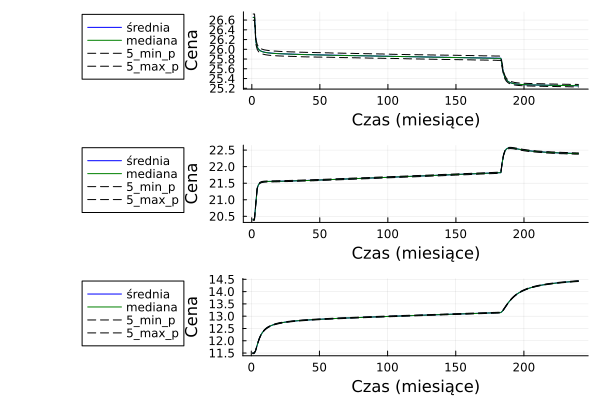

In [36]:
plot_by_district_price(avg_house_price_per_district_and_time, median_house_price_per_district_and_time, house_price_5p_min, house_price_5p_max)

In [9]:
function plot_by_district_house_price(avg_house_price_per_district_and_time)
    n_time = size(avg_house_price_per_district_and_time, 2)
    p = plot(title = "Cena mieszkania w dzielnicach w czasie dla 50 symulacji", titlefontsize =10,xlabel="Czas (miesiące)",ylabel="Średnia cena", legend=:topright,  size=(800, 600))
    plot!(p,1:n_time,avg_house_price_per_district_and_time[1,:], label="Dzielnica 1")
    plot!(p,1:n_time,avg_house_price_per_district_and_time[2,:], label="Dzielnica 2")
    plot!(p,1:n_time,avg_house_price_per_district_and_time[3,:], label="Dzielnica 3")
    p
end

plot_by_district_house_price (generic function with 1 method)

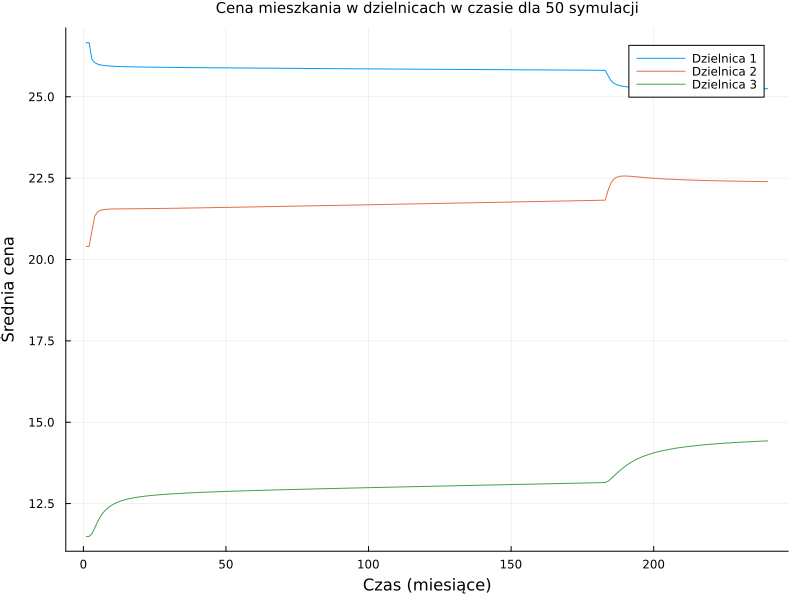

In [38]:
plot_by_district_house_price(avg_house_price_per_district_and_time)

## Analiza wrażliwości

### Zmiana inicjalizacji dochodu

Zmiana inicjalizacji dochodu dla agentów w dzielnicach. Zamiast wspólnego rozkładu Pareta III, dla każdej dzielnicy losowe wyciągnięcie będzie robione z "własnego" rozkładu. Odmiana jest nieistotna ze względu na przemnożenie przez granicę cenową, jednak ma sens w ramach analizy wrażliwości.

In [2]:
n_simulations = 50 #liczba symulacji

50

In [40]:
@time for sim in 1:n_simulations
    println("Symulacja $sim z $n_simulations") #żeby śledzić proces symulacji
    
    AGENCI = zeros(Nᴵ+Nᴵᴵ+Nᴵᴵᴵ,5,T) #oczyszczenie stanu AGENCI dla nowej symulacji
    #[INDEKS AGENTA, [DZIELNICA,DOCHÓD,PIERWSZA WSPÓŁRZĘDNA,DRUGA WSPÓŁRZĘDNA,CZAS TRWANIA DŁUGU],T]
    #Inicjalizacja dzielnic
    #Dzielnica I
    for n in 1:Nᴵ
         while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽¹⁾ || AGENCI[n,2,1] < P_dolna⁽¹⁾ #przy zerowym dochodzie albo dochodu spoza przedzialow dzielnicy 1
            AGENCI[n,2,1] = rand(Pocz_rozk_I)*P_górna⁽¹⁾*5 #losujemy dochod poczatkowy z rozkladu Pareta
        end
        AGENCI[n,1,1:2] .= 1 #dzielnica 1
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] #cena mieszkania (pierwsz wspolrzedna) = wylosowany dochod
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1)) #druga wspolrzedna jest losowana z rozkladu jednostajnego
    end


    for n in Nᴵ+1:Nᴵ+Nᴵᴵ
        while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽²⁾ || AGENCI[n,2,1] < P_dolna⁽²⁾
            AGENCI[n,2,1] = rand(Pocz_rozk_II)*P_górna⁽²⁾*5
        end
        AGENCI[n,1,1:2] .= 2
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
    end

    for n in Nᴵ+Nᴵᴵ+1:Nᴵ+Nᴵᴵ+Nᴵᴵᴵ
        while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽³⁾ || AGENCI[n,2,1] < P_dolna⁽³⁾
            AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽³⁾*5
        end
        AGENCI[n,1,1:2] .= 3
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
    end
    #ILU AGENTÓW MA POCZĄTKOWO NIEZEROWY DŁUG (SPŁATY POZA MODELEM)? - Początkowy dług
    Nᵖᵒᶜᶻᵈᵍ = 15000
    X = rand(1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ,Nᵖᵒᶜᶻᵈᵍ)
    for m in 1:Nᵖᵒᶜᶻᵈᵍ
        AGENCI[X[m],5,1] =  rand(1:CZAS) #LOSOWA ZAPADALNOŚĆ DŁUGU - TUTAJ JEST TO LICZBA MIESIĘCY OD ZACIĄGNIĘCIA
        if AGENCI[X[m],5,1] == CZAS
            AGENCI[X[m],5,2] = 0
        else
            AGENCI[X[m],5,2] = AGENCI[X[m],5,1] + 1
        end
    end

    #symulacja w czasie
    for t in 2:T-1 #12*20
        #WZROST/WAHANIA CEN?
        for n in 1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ #liczba mieszkancow
            if AGENCI[n,1,t] == 3 #jesli dzielnica 3
                przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾ #losujemy zmiane dochodu
                while przyrost > P_górna⁽³⁾ #dopoki nie przejdzie prog gorny
                    przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost #aktualizacja dochodu
                if AGENCI[n,2,t] > AGENCI[n,2,t-1] && AGENCI[n,5,t] == 0 #jezeli dochod wzrosl i nastapil czas (minal okres splat dlugu)
                    #print("tu1")
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    if AGENCI[n,3,t] < P_dolna⁽²⁾ #jesli cena mieszkania ponizej drugiego progu dolnego
                        #println("tu2")
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽³⁾, upper=P_górna⁽³⁾)) #w tej samej dzielnicy 3
                        AGENCI[n,1,t+1] = 3 #w przyszlym okresie zostaje dzielnica 3
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba #cena mieszkania jest wyzsza od aktualnego dochodu ORAZ agent nie przenosi się do miejsca, gdzie poziom dochodów jest wyższy niż to, na co go stać 
                            AGENCI[n,3,t+1] = próba #aktualizacja ceny mieszkania (wsporzednej)
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1)) #losujemy
                            AGENCI[n,5,t+1] = 1 #1. okres dlugu
                        else #gorsze mieszkanie albo nie stać
                            AGENCI[n,3,t+1] = AGENCI[n,3,t] #zostaje jak jest 
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    else #jesli dochod powyzej drugiego progu dolnego 
                        #println("tu3")
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽²⁾, upper=P_górna⁽³⁾)) #miedzy dolnym 2 a gornym 3
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 2 #zmiana dzielnicy
                            AGENCI[n,3,t+1] = próba #nowa cena mieszkania
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1)) #nowa losowa lokalizacja
                            AGENCI[n,5,t+1] = 1 #1. okres dlugu
                        else #gorsze mieszkanie albo nie stać
                            AGENCI[n,1,t+1] = 3 #linijka 37 poprawiona, zostaje w tej samej dzielnicy
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    end
                else #w porownaniu do poprzedniego okresu dochod NIE wzrosl albo nie splacony dlug
                    #println("tu4")
                    AGENCI[n,1,t+1] = 3 #zostaje w dzielnicy 3
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS #jezeli nie splaca dlugu to czeka na kolejne losowanie
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1 #czeka az splaci
                    end
                end
           
            elseif AGENCI[n,1,t] == 2 #dla dzielnicy 2 to samo
                przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾
                while przyrost > P_górna⁽²⁾
                    przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                if AGENCI[n,2,t] > AGENCI[n,2,t-1]  && AGENCI[n,5,t] == 0
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    if AGENCI[n,3,t] < P_dolna⁽¹⁾ #linijka jest poprawiona
                        #print("tu5")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽²⁾, upper=P_górna⁽²⁾))
                        AGENCI[n,1,t+1] = 2
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    else
                        #print("tu6")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽¹⁾, upper=P_górna⁽²⁾))
                         if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 1
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,1,t+1] = 2
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    end
                else
                    #print("tu7")
                    AGENCI[n,1,t+1] = 2 #linijka 94 poprawiona
                    AGENCI[n,3,t+1] = AGENCI[n,3,t] 
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            else #dla dzielnicy 1

                AGENCI[n,2,t] = AGENCI[n,2,t] + 0.1*rand(Pocz_rozk_I) #zmniejszenie tempa zmian dochodu (opoznienie modelu), można skasować
                if AGENCI[n,2,t] > AGENCI[n,2,t-1]  && AGENCI[n,5,t] == 0
                    przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾
                    while przyrost > P_górna⁽²⁾
                        przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾
                    end
                    AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                    #print("tu8")
                    #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                    if AGENCI[n,3,t] < próba && AGENCI[n,2,t] > próba
                        próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = próba
                        AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                        AGENCI[n,5,t+1] = 1
                    else
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = AGENCI[n,3,t]
                        AGENCI[n,4,t+1] = AGENCI[n,4,t]
                        AGENCI[n,5,t+1] = 0
                    end
                else
                    #print("tu9")
                    AGENCI[n,1,t+1] = 1
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
                
            end 
        end
    end
    results[sim, :, :, :] = AGENCI  #zachowanie wyników
end

Symulacja 1 z 50
Symulacja 2 z 50
Symulacja 3 z 50
Symulacja 4 z 50
Symulacja 5 z 50
Symulacja 6 z 50
Symulacja 7 z 50
Symulacja 8 z 50
Symulacja 9 z 50
Symulacja 10 z 50
Symulacja 11 z 50
Symulacja 12 z 50
Symulacja 13 z 50
Symulacja 14 z 50
Symulacja 15 z 50
Symulacja 16 z 50
Symulacja 17 z 50
Symulacja 18 z 50
Symulacja 19 z 50
Symulacja 20 z 50
Symulacja 21 z 50
Symulacja 22 z 50
Symulacja 23 z 50
Symulacja 24 z 50
Symulacja 25 z 50
Symulacja 26 z 50
Symulacja 27 z 50
Symulacja 28 z 50
Symulacja 29 z 50
Symulacja 30 z 50
Symulacja 31 z 50
Symulacja 32 z 50
Symulacja 33 z 50
Symulacja 34 z 50
Symulacja 35 z 50
Symulacja 36 z 50
Symulacja 37 z 50
Symulacja 38 z 50
Symulacja 39 z 50
Symulacja 40 z 50
Symulacja 41 z 50
Symulacja 42 z 50
Symulacja 43 z 50
Symulacja 44 z 50
Symulacja 45 z 50
Symulacja 46 z 50
Symulacja 47 z 50
Symulacja 48 z 50
Symulacja 49 z 50
Symulacja 50 z 50
28284.309355 seconds (16.70 G allocations: 307.008 GiB, 1.49% gc time, 0.00% compilation time)


In [41]:
avg_agents_per_district_and_time, median_agents_per_district_and_time, agents_5p_min, agents_5p_max = analyze_avg_agents(results)

([5000.0 5000.0 … 14735.46 14744.69; 25000.0 25000.0 … 16955.32 16954.29; 50000.0 50000.0 … 48309.22 48301.02], [5000.0 5000.0 … 14741.0 14753.0; 25000.0 25000.0 … 16955.0 16955.0; 50000.0 50000.0 … 48307.0 48301.0], [5000.0 5000.0 … 13582.0 13593.900000000001; 25000.0 25000.0 … 15765.949999999999 15764.800000000001; 50000.0 50000.0 … 48255.450000000004 48246.35], [5000.0 5000.0 … 15866.849999999999 15880.6; 25000.0 25000.0 … 18135.1 18129.199999999997; 50000.0 50000.0 … 48379.049999999996 48372.05])

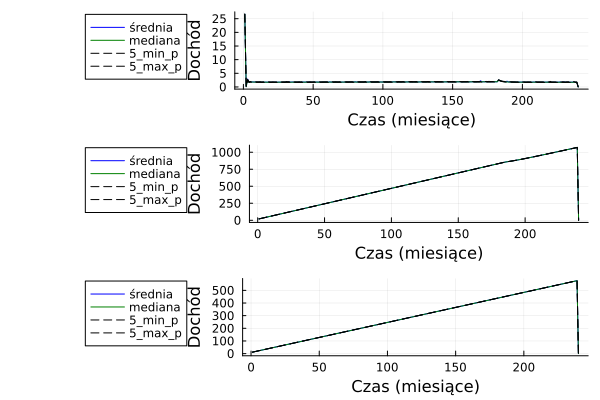

In [42]:
plot_by_district_income(avg_income_per_district_and_time, median_income_per_district_and_time, income_5p_min, income_5p_max)

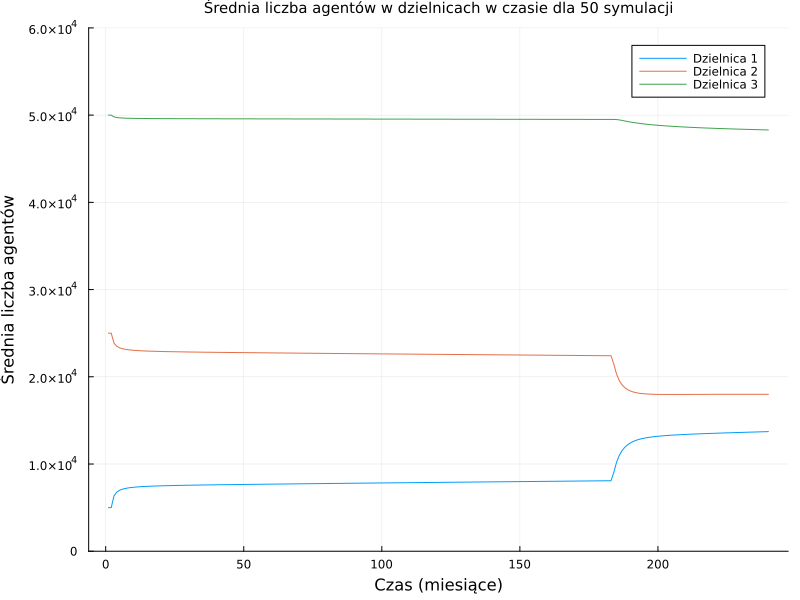

In [39]:
plot_avg_agent_by_district(avg_agents_per_district_and_time)  

In [44]:
avg_income_per_district_and_time, median_income_per_district_and_time, income_5p_min, income_5p_max,
    avg_house_price_per_district_and_time, median_house_price_per_district_and_time, house_price_5p_min, house_price_5p_max = analyze_income_and_house_prices(results)

([27.40519208908081 0.09744957439601422 … 1.768846391439438 0.0; 20.66415012359619 25.208718338012694 … 1069.0211450195313 0.0; 11.492657861709596 13.867261447906493 … 576.5564093017579 0.0], [27.418193817138672 0.0938931368291378 … 1.7691190838813782 0.0; 20.66771697998047 25.206871032714844 … 1069.107421875 0.0; 11.492583274841309 13.866909980773926 … 576.5557861328125 0.0], [26.603273582458495 0.07140844315290451 … 1.6764374077320099 0.0; 20.38117570877075 24.915978527069093 … 1066.123486328125 0.0; 11.47804651260376 13.853559350967407 … 576.4827117919922 0.0], [28.221939373016358 0.13028208464384075 … 1.8505387365818025 0.0; 20.94362096786499 25.50238332748413 … 1072.001885986328 0.0; 11.508759164810181 13.885211992263795 … 576.6279083251953 0.0], [27.40519208908081 27.40519208908081 … 25.43864387512207 25.438126640319823; 20.66415012359619 20.66415012359619 … 22.41765464782715 22.416291484832765; 11.492657861709596 11.492657861709596 … 14.421600732803345 14.425365705490112], [27.4

In [45]:
avg_income_per_district_and_time

3×240 Matrix{Float64}:
 27.4052   0.0974496   2.56293   1.81262  …     1.77437     1.76885  0.0
 20.6642  25.2087     29.5044   33.9449      1064.72     1069.02     0.0
 11.4927  13.8673     16.2133   18.5782       574.182     576.556    0.0

Losowa inicjalizacja dochodów z rózkładów Pareta z różnymi współczynnikami kształtu pozwala mieszkańcom dzielnicy II szybciej migrować do dzielnicy I  ze względu na średnią liczbę agentów w dzielnicach. Im większy wsp. kształtu, tym mniejsze p-stwo dla ekstremalnych wartości ("chudszy ogon"). Kiedy dla wszystkich dzielnic stosowany ten sam wsp. = 5 (czyli wysoki), tempo migracji było mniejsze. Mniejsze wsp. dla dzielnicy I i II prowadzą do zwiększonego p-stwa ekstremalnych wartości, co z kolei przekłada się na bardziej szybkie przyrosty dochodów. 

### Skasowanie spowolnienia zmiany dochodów w dzielnicy I

Zakomentowanie linijki AGENCI[n,2,t] = AGENCI[n,2,t] + 0.1*rand(Pocz_rozk_I). 

Zamiast tego, stosuje się dochód w poprzednim okresie. AGENCI[n,2,t] = AGENCI[n,2,t-1]

In [4]:
@time for sim in 1:n_simulations
    println("Symulacja $sim z $n_simulations") #żeby śledzić proces symulacji
    
    AGENCI = zeros(Nᴵ+Nᴵᴵ+Nᴵᴵᴵ,5,T) #oczyszczenie stanu AGENCI dla nowej symulacji
    #[INDEKS AGENTA, [DZIELNICA,DOCHÓD,PIERWSZA WSPÓŁRZĘDNA,DRUGA WSPÓŁRZĘDNA,CZAS TRWANIA DŁUGU],T]
    #Inicjalizacja dzielnic
    #Dzielnica I
    for n in 1:Nᴵ
         while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽¹⁾ || AGENCI[n,2,1] < P_dolna⁽¹⁾ #przy zerowym dochodzie albo dochodu spoza przedzialow dzielnicy 1
            AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽¹⁾*5 #losujemy dochod poczatkowy z rozkladu Pareta
        end
        AGENCI[n,1,1:2] .= 1 #dzielnica 1
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] #cena mieszkania (pierwsz wspolrzedna) = wylosowany dochod
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1)) #druga wspolrzedna jest losowana z rozkladu jednostajnego
    end


    for n in Nᴵ+1:Nᴵ+Nᴵᴵ
        while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽²⁾ || AGENCI[n,2,1] < P_dolna⁽²⁾
            AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽²⁾*5
        end
        AGENCI[n,1,1:2] .= 2
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
    end

    for n in Nᴵ+Nᴵᴵ+1:Nᴵ+Nᴵᴵ+Nᴵᴵᴵ
        while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽³⁾ || AGENCI[n,2,1] < P_dolna⁽³⁾
            AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽³⁾*5
        end
        AGENCI[n,1,1:2] .= 3
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
    end
    #ILU AGENTÓW MA POCZĄTKOWO NIEZEROWY DŁUG (SPŁATY POZA MODELEM)? - Początkowy dług
    Nᵖᵒᶜᶻᵈᵍ = 15000
    X = rand(1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ,Nᵖᵒᶜᶻᵈᵍ)
    for m in 1:Nᵖᵒᶜᶻᵈᵍ
        AGENCI[X[m],5,1] =  rand(1:CZAS) #LOSOWA ZAPADALNOŚĆ DŁUGU - TUTAJ JEST TO LICZBA MIESIĘCY OD ZACIĄGNIĘCIA
        if AGENCI[X[m],5,1] == CZAS
            AGENCI[X[m],5,2] = 0
        else
            AGENCI[X[m],5,2] = AGENCI[X[m],5,1] + 1
        end
    end

    #symulacja w czasie
    for t in 2:T-1 #12*20
        #WZROST/WAHANIA CEN?
        for n in 1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ #liczba mieszkancow
            if AGENCI[n,1,t] == 3 #jesli dzielnica 3
                przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾ #losujemy zmiane dochodu
                while przyrost > P_górna⁽³⁾ #dopoki nie przejdzie prog gorny
                    przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost #aktualizacja dochodu
                if AGENCI[n,2,t] > AGENCI[n,2,t-1] && AGENCI[n,5,t] == 0 #jezeli dochod wzrosl i nastapil czas (minal okres splat dlugu)
                    #print("tu1")
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    if AGENCI[n,3,t] < P_dolna⁽²⁾ #jesli cena mieszkania ponizej drugiego progu dolnego
                        #println("tu2")
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽³⁾, upper=P_górna⁽³⁾)) #w tej samej dzielnicy 3
                        AGENCI[n,1,t+1] = 3 #w przyszlym okresie zostaje dzielnica 3
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba #cena mieszkania jest wyzsza od aktualnego dochodu ORAZ agent nie przenosi się do miejsca, gdzie poziom dochodów jest wyższy niż to, na co go stać 
                            AGENCI[n,3,t+1] = próba #aktualizacja ceny mieszkania (wsporzednej)
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1)) #losujemy
                            AGENCI[n,5,t+1] = 1 #1. okres dlugu
                        else #gorsze mieszkanie albo nie stać
                            AGENCI[n,3,t+1] = AGENCI[n,3,t] #zostaje jak jest 
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    else #jesli dochod powyzej drugiego progu dolnego 
                        #println("tu3")
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽²⁾, upper=P_górna⁽³⁾)) #miedzy dolnym 2 a gornym 3
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 2 #zmiana dzielnicy
                            AGENCI[n,3,t+1] = próba #nowa cena mieszkania
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1)) #nowa losowa lokalizacja
                            AGENCI[n,5,t+1] = 1 #1. okres dlugu
                        else #gorsze mieszkanie albo nie stać
                            AGENCI[n,1,t+1] = 3 #linijka 37 poprawiona, zostaje w tej samej dzielnicy
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    end
                else #w porownaniu do poprzedniego okresu dochod NIE wzrosl albo nie splacony dlug
                    #println("tu4")
                    AGENCI[n,1,t+1] = 3 #zostaje w dzielnicy 3
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS #jezeli nie splaca dlugu to czeka na kolejne losowanie
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1 #czeka az splaci
                    end
                end
           
            elseif AGENCI[n,1,t] == 2 #dla dzielnicy 2 to samo
                przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾
                while przyrost > P_górna⁽²⁾
                    przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                if AGENCI[n,2,t] > AGENCI[n,2,t-1]  && AGENCI[n,5,t] == 0
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    if AGENCI[n,3,t] < P_dolna⁽¹⁾ #linijka jest poprawiona
                        #print("tu5")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽²⁾, upper=P_górna⁽²⁾))
                        AGENCI[n,1,t+1] = 2
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    else
                        #print("tu6")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽¹⁾, upper=P_górna⁽²⁾))
                         if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 1
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,1,t+1] = 2
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    end
                else
                    #print("tu7")
                    AGENCI[n,1,t+1] = 2 #linijka 94 poprawiona
                    AGENCI[n,3,t+1] = AGENCI[n,3,t] 
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            else #dla dzielnicy 1

                AGENCI[n,2,t] = AGENCI[n,2,t-1] #zmniejszenie tempa zmian dochodu (opoznienie modelu), można skasować
                if AGENCI[n,2,t] > AGENCI[n,2,t-1]  && AGENCI[n,5,t] == 0
                    przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾
                    while przyrost > P_górna⁽²⁾
                        przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾
                    end
                    AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                    #print("tu8")
                    #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                    if AGENCI[n,3,t] < próba && AGENCI[n,2,t] > próba
                        próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = próba
                        AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                        AGENCI[n,5,t+1] = 1
                    else
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = AGENCI[n,3,t]
                        AGENCI[n,4,t+1] = AGENCI[n,4,t]
                        AGENCI[n,5,t+1] = 0
                    end
                else
                    #print("tu9")
                    AGENCI[n,1,t+1] = 1
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            end 
        end
        AGENCI[:, 2, end] = AGENCI[:, 2, end - 1] #aby w ostatnim okresie symulacji nie zerowały się dochody
    end
    results[sim, :, :, :] = AGENCI  #zachowanie wyników
end

Symulacja 1 z 50
Symulacja 2 z 50
Symulacja 3 z 50
Symulacja 4 z 50
Symulacja 5 z 50
Symulacja 6 z 50
Symulacja 7 z 50
Symulacja 8 z 50
Symulacja 9 z 50
Symulacja 10 z 50
Symulacja 11 z 50
Symulacja 12 z 50
Symulacja 13 z 50
Symulacja 14 z 50
Symulacja 15 z 50
Symulacja 16 z 50
Symulacja 17 z 50
Symulacja 18 z 50
Symulacja 19 z 50
Symulacja 20 z 50
Symulacja 21 z 50
Symulacja 22 z 50
Symulacja 23 z 50
Symulacja 24 z 50
Symulacja 25 z 50
Symulacja 26 z 50
Symulacja 27 z 50
Symulacja 28 z 50
Symulacja 29 z 50
Symulacja 30 z 50
Symulacja 31 z 50
Symulacja 32 z 50
Symulacja 33 z 50
Symulacja 34 z 50
Symulacja 35 z 50
Symulacja 36 z 50
Symulacja 37 z 50
Symulacja 38 z 50
Symulacja 39 z 50
Symulacja 40 z 50
Symulacja 41 z 50
Symulacja 42 z 50
Symulacja 43 z 50
Symulacja 44 z 50
Symulacja 45 z 50
Symulacja 46 z 50
Symulacja 47 z 50
Symulacja 48 z 50
Symulacja 49 z 50
Symulacja 50 z 50
7922.972835 seconds (16.15 G allocations: 303.797 GiB, 2.04% gc time, 0.01% compilation time)


In [25]:
avg_agents_per_district_and_time, median_agents_per_district_and_time, agents_5p_min, agents_5p_max = analyze_avg_agents(results)

([5000.0 5000.0 … 13704.94 13713.44; 25000.0 25000.0 … 17989.12 17988.4; 50000.0 50000.0 … 48305.94 48298.16], [5000.0 5000.0 … 13713.5 13722.5; 25000.0 25000.0 … 17978.0 17974.0; 50000.0 50000.0 … 48305.0 48297.5], [5000.0 5000.0 … 13565.5 13572.5; 25000.0 25000.0 … 17872.35 17877.8; 50000.0 50000.0 … 48239.15 48228.8], [5000.0 5000.0 … 13823.55 13834.1; 25000.0 25000.0 … 18149.3 18154.5; 50000.0 50000.0 … 48389.15 48377.8])

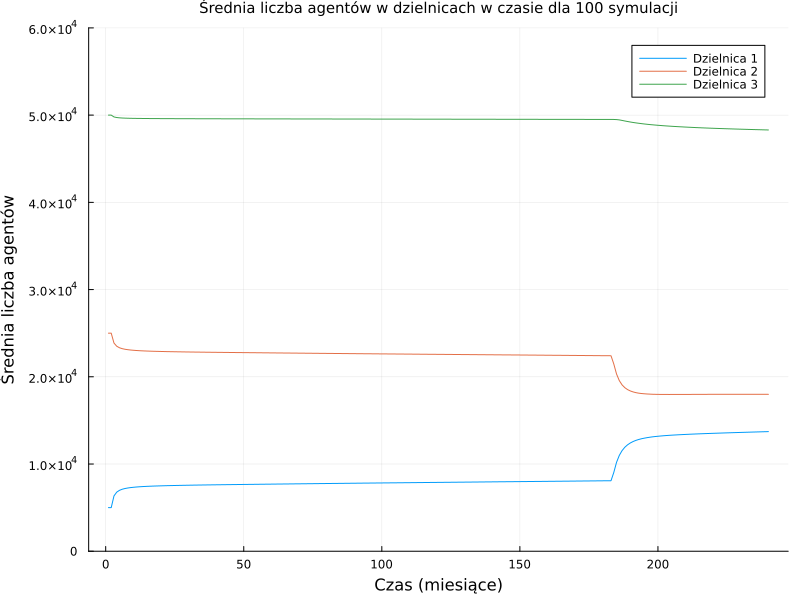

In [26]:
plot_avg_agent_by_district(avg_agents_per_district_and_time)  

In [27]:
avg_income_per_district_and_time, median_income_per_district_and_time, income_5p_min, income_5p_max,
    avg_house_price_per_district_and_time, median_house_price_per_district_and_time, house_price_5p_min, house_price_5p_max = analyze_income_and_house_prices(results)

([26.661590995788575 26.661590995788575 … 393.9364324951172 394.37544921875; 20.400791473388672 24.947301063537598 … 1070.7349365234375 1070.5079809570314; 11.491193962097167 13.866066455841064 … 576.5499182128906 576.5492590332032], [26.665834426879883 26.665834426879883 … 393.9108581542969 394.4554443359375; 20.401511192321777 24.945653915405273 … 1070.6868286132812 1070.4617309570312; 11.490700721740723 13.866592407226562 … 576.5612487792969 576.560791015625], [26.579926776885987 26.579926776885987 … 389.3063369750977 389.87398834228514; 20.38275308609009 24.914795303344725 … 1069.1311767578125 1068.8608520507812; 11.475068426132204 13.84952802658081 … 576.4573028564453 576.4558532714843], [26.72609987258911 26.72609987258911 … 398.27371673583986 398.7127227783203; 20.418372535705565 24.979179477691652 … 1072.486767578125 1072.3511657714844; 11.504506826400757 13.878780126571655 … 576.6223388671875 576.6215423583985], [26.661590995788575 26.661590995788575 … 25.248288230895994 25.24

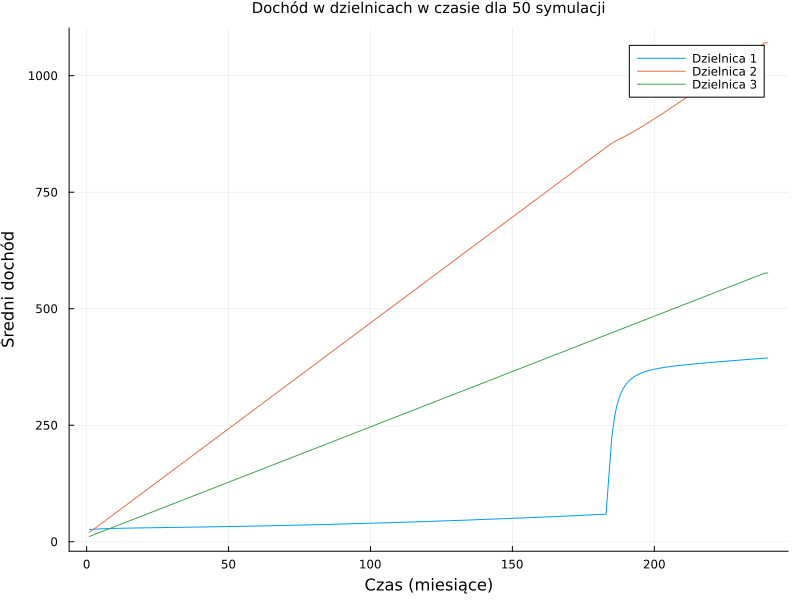

In [40]:
plot_by_district_income(avg_income_per_district_and_time)

## Analiza wrażliwości parametrów - α

Aby usprawnić analizę parametrów, jest tworzona funkcja symulacji z domyślnymi wartościami parametrów.

In [10]:
function simulation_process(Nᴵ = 5000, Nᴵᴵ = 25000, Nᴵᴵᴵ = 50000; #keyword argumenty 
        P_górna⁽¹⁾= 35, P_górna⁽²⁾= 25, P_dolna⁽¹⁾= 23, P_górna⁽³⁾=19, P_dolna⁽²⁾= 18, P_dolna⁽³⁾= 8,
        T = 12*20, CZAS = 15*12, 
        α₁ = 1, θ₁ = 0.1, α₂ = 2, θ₂ = 0.1, α₃ = 5, θ₃ = 0.1, tempo_zmian⁽¹⁾=0.1, n_simulations=70)
    
    Pocz_rozk_I = Pareto(α₁, θ₁)
    Pocz_rozk_II = Pareto(α₂, θ₂)
    Pocz_rozk_III = Pareto(α₃, θ₃)

    results = zeros(n_simulations, Nᴵ+Nᴵᴵ+Nᴵᴵᴵ, 5, T) #wyniki

    for sim in 1:n_simulations
        #print("Symulacja $sim", " ") #żeby śledzić proces symulacji
    
        AGENCI = zeros(Float32, Nᴵ+Nᴵᴵ+Nᴵᴵᴵ,5,T) #oczyszczenie stanu AGENCI dla nowej symulacji
    #[INDEKS AGENTA, [DZIELNICA,DOCHÓD,PIERWSZA WSPÓŁRZĘDNA,DRUGA WSPÓŁRZĘDNA,CZAS TRWANIA DŁUGU],T]
    #Inicjalizacja dzielnic
    #Dzielnica I
    for n in 1:Nᴵ
         while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽¹⁾ || AGENCI[n,2,1] < P_dolna⁽¹⁾ #przy zerowym dochodzie albo dochodu spoza przedzialow dzielnicy 1
            AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽¹⁾*5 #losujemy dochod poczatkowy z rozkladu Pareta
        end
        AGENCI[n,1,1:2] .= 1 #dzielnica 1
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] #cena mieszkania (pierwsz wspolrzedna) = wylosowany dochod
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1)) #druga wspolrzedna jest losowana z rozkladu jednostajnego
    end


    for n in Nᴵ+1:Nᴵ+Nᴵᴵ
        while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽²⁾ || AGENCI[n,2,1] < P_dolna⁽²⁾
            AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽²⁾*5
        end
        AGENCI[n,1,1:2] .= 2
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
    end

    for n in Nᴵ+Nᴵᴵ+1:Nᴵ+Nᴵᴵ+Nᴵᴵᴵ
        while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽³⁾ || AGENCI[n,2,1] < P_dolna⁽³⁾
            AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽³⁾*5
        end
        AGENCI[n,1,1:2] .= 3
        AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
        AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
    end
    #ILU AGENTÓW MA POCZĄTKOWO NIEZEROWY DŁUG (SPŁATY POZA MODELEM)? - Początkowy dług
    Nᵖᵒᶜᶻᵈᵍ = 15000
    X = rand(1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ,Nᵖᵒᶜᶻᵈᵍ)
    for m in 1:Nᵖᵒᶜᶻᵈᵍ
        AGENCI[X[m],5,1] =  rand(1:CZAS) #LOSOWA ZAPADALNOŚĆ DŁUGU - TUTAJ JEST TO LICZBA MIESIĘCY OD ZACIĄGNIĘCIA
        if AGENCI[X[m],5,1] == CZAS
            AGENCI[X[m],5,2] = 0
        else
            AGENCI[X[m],5,2] = AGENCI[X[m],5,1] + 1
        end
    end
       

    #symulacja w czasie
        for t in 2:T-1 #12*20
            #WZROST/WAHANIA CEN?
            for n in 1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ #liczba mieszkancow
                if AGENCI[n,1,t] == 3 #jesli dzielnica 3
                    przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾ #losujemy zmiane dochodu
                    while przyrost > P_górna⁽³⁾ #dopoki nie przejdzie prog gorny
                        przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾
                    end
                    AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost #aktualizacja dochodu
                    if AGENCI[n,2,t] > AGENCI[n,2,t-1] && AGENCI[n,5,t] == 0 #jezeli dochod wzrosl i nastapil czas (minal okres splat dlugu)
                    #print("tu1")
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                        if AGENCI[n,3,t] < P_dolna⁽²⁾ #jesli cena mieszkania ponizej drugiego progu dolnego
                        #println("tu2")
                            próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽³⁾, upper=P_górna⁽³⁾)) #w tej samej dzielnicy 3
                            AGENCI[n,1,t+1] = 3 #w przyszlym okresie zostaje dzielnica 3
                            if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba #cena mieszkania jest wyzsza od aktualnego dochodu ORAZ agent nie przenosi się do miejsca, gdzie poziom dochodów jest wyższy niż to, na co go stać 
                                AGENCI[n,3,t+1] = próba #aktualizacja ceny mieszkania (wsporzednej)
                                AGENCI[n,4,t+1] = rand(Uniform(0, 1)) #losujemy
                                AGENCI[n,5,t+1] = 1 #1. okres dlugu
                            else #gorsze mieszkanie albo nie stać
                                AGENCI[n,3,t+1] = AGENCI[n,3,t] #zostaje jak jest 
                                AGENCI[n,4,t+1] = AGENCI[n,4,t]
                                AGENCI[n,5,t+1] = 0
                            end
                        else #jesli dochod powyzej drugiego progu dolnego 
                            #println("tu3")
                            próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽²⁾, upper=P_górna⁽³⁾)) #miedzy dolnym 2 a gornym 3
                            if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                                AGENCI[n,1,t+1] = 2 #zmiana dzielnicy
                                AGENCI[n,3,t+1] = próba #nowa cena mieszkania
                                AGENCI[n,4,t+1] = rand(Uniform(0, 1)) #nowa losowa lokalizacja
                                AGENCI[n,5,t+1] = 1 #1. okres dlugu
                            else #gorsze mieszkanie albo nie stać
                                AGENCI[n,1,t+1] = 3 #linijka 37 poprawiona, zostaje w tej samej dzielnicy
                                AGENCI[n,3,t+1] = AGENCI[n,3,t]
                                AGENCI[n,4,t+1] = AGENCI[n,4,t]
                                AGENCI[n,5,t+1] = 0
                            end
                        end
                    else #w porownaniu do poprzedniego okresu dochod NIE wzrosl albo nie splacony dlug
                    #println("tu4")
                        AGENCI[n,1,t+1] = 3 #zostaje w dzielnicy 3
                        AGENCI[n,3,t+1] = AGENCI[n,3,t]
                        AGENCI[n,4,t+1] = AGENCI[n,4,t]
                        if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS #jezeli nie splaca dlugu to czeka na kolejne losowanie
                            AGENCI[n,5,t+1] = 0
                        else
                            AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1 #czeka az splaci
                        end
                    end
           
                elseif AGENCI[n,1,t] == 2 #dla dzielnicy 2 to samo
                    przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾
                    while przyrost > P_górna⁽²⁾
                        przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾
                    end
                    AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                    if AGENCI[n,2,t] > AGENCI[n,2,t-1]  && AGENCI[n,5,t] == 0
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                        if AGENCI[n,3,t] < P_dolna⁽¹⁾ #linijka jest poprawiona
                        #print("tu5")
                            próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽²⁾, upper=P_górna⁽²⁾))
                            AGENCI[n,1,t+1] = 2
                            if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                                AGENCI[n,3,t+1] = próba
                                AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                                AGENCI[n,5,t+1] = 1
                            else
                                AGENCI[n,3,t+1] = AGENCI[n,3,t]
                                AGENCI[n,4,t+1] = AGENCI[n,4,t]
                                AGENCI[n,5,t+1] = 0
                            end
                        else
                        #print("tu6")
                            próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽¹⁾, upper=P_górna⁽²⁾))
                             if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                                AGENCI[n,1,t+1] = 1
                                AGENCI[n,3,t+1] = próba
                                AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                                AGENCI[n,5,t+1] = 1
                            else
                                AGENCI[n,1,t+1] = 2
                                AGENCI[n,3,t+1] = AGENCI[n,3,t]
                                AGENCI[n,4,t+1] = AGENCI[n,4,t]
                                AGENCI[n,5,t+1] = 0
                            end
                        end
                    else
                    #print("tu7")
                        AGENCI[n,1,t+1] = 2 #linijka 94 poprawiona
                        AGENCI[n,3,t+1] = AGENCI[n,3,t] 
                        AGENCI[n,4,t+1] = AGENCI[n,4,t]
                        if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                            AGENCI[n,5,t+1] = 0
                        else
                            AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                        end
                    end
                else #dla dzielnicy 1

                    AGENCI[n,2,t] = AGENCI[n,2,t] + tempo_zmian⁽¹⁾*rand(Pocz_rozk_I) #zmniejszenie tempa zmian dochodu (opoznienie modelu), można skasować
                    if AGENCI[n,2,t] > AGENCI[n,2,t-1]  && AGENCI[n,5,t] == 0
                        przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾
                        while przyrost > P_górna⁽²⁾
                            przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾
                        end
                        AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                    #print("tu8")
                    #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                        próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                        if AGENCI[n,3,t] < próba && AGENCI[n,2,t] > próba
                            próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                            AGENCI[n,1,t+1] = 1
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,1,t+1] = 1
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    else
                    #print("tu9")
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = AGENCI[n,3,t]
                        AGENCI[n,4,t+1] = AGENCI[n,4,t]
                        if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                            AGENCI[n,5,t+1] = 0
                        else
                            AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                        end
                    end
                
                end 
            end
            AGENCI[:, 2, end] = AGENCI[:, 2, end - 1] #aby w ostatnim okresie symulacji nie zerowały się dochody
        end
        results[sim, :, :, :] = AGENCI  #zachowanie wyników
    end
    return results
end

simulation_process (generic function with 4 methods)

Najpierw przestestowano zmianę wsp. kształtu rozkładu Pareta. Agenci z dzielnicy I nie przemieszczają się do innych dzielnic, dlatego raczej interesuje nas dynamika zmiany dzielnicy dla agentów II i III. 

In [13]:
max_alpha = 7
max_theta = 0.3
n_sim = 3

3

In [ ]:
combination_results_alpha = DataFrame(
    α₂ = Int[],
    α₃ = Int[],
    avg_agents = Matrix{Float32}[],
    median_agents = Matrix{Float32}[],
    min_5p_agents = Matrix{Float32}[],
    max_5p_agents = Matrix{Float32}[],
    avg_income = Matrix{Float32}[],
    median_income = Matrix{Float32}[],
    min_5p_income = Matrix{Float32}[],
    max_5p_income = Matrix{Float32}[],
    avg_hp = Matrix{Float32}[],
    median_hp = Matrix{Float32}[],
    min_5p_hp = Matrix{Float32}[],
    max_5p_hp = Matrix{Float32}[]
) 
for α₂ in 1:max_alpha #siatka wsp. dla II
        for α₃ in 1:max_alpha #siatka wsp. dla III
            combination = simulation_process(α₂=α₂, α₃=α₃, n_simulations=n_sim)
            avg_agent_sim, median_agent_sim, min_5p_agent_sim, max_5p_agent_sim = analyze_avg_agents(combination) #liczba agentow w dzielnicach
            avg_income_sim, median_income_sim, min_5p_income_sim, max_5p_income_sim, #dochody
            avg_hp_sim, median_hp_sim, min_5p_hp_sim, max_5p_hp_sim = analyze_income_and_house_prices(combination) #ceny mieszkań
        push!(combination_results_alpha, (α₂, α₃,
            avg_agent_sim, median_agent_sim, min_5p_agent_sim, max_5p_agent_sim,
            avg_income_sim, median_income_sim, min_5p_income_sim, max_5p_income_sim,
            avg_hp_sim, median_hp_sim, min_5p_hp_sim, max_5p_hp_sim
        ))
    end
end          

Uśrednione wyniki symulacji dla różnych kombinacji parametrów

In [20]:
combination_results_alpha

Row,α₂,α₃,avg_agents,median_agents,min_5p_agents,max_5p_agents,avg_income,median_income,min_5p_income,max_5p_income,avg_hp,median_hp,min_5p_hp,max_5p_hp
,Int64,Int64,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…


In [ ]:
comp_filtered_rows = filter(row -> 
    (row.α₂ == 1 && row.α₃ == 1) || 
    (row.α₂ == 1 && row.α₃ == 7), combination_results_alpha)

In [ ]:
n_time = size(comp_filtered_rows.avg_agents[1], 2)

In [ ]:
p = plot(title="Średnia liczba agentów w dzielnicach w czasie dla 3 symulacji", 
             titlefontsize=10, 
             xlabel="Czas (miesiące)", 
             ylabel="Średnia liczba agentów", 
             ylim=(0, 60000), 
             legend=:outertopright, 
             size=(800, 600))
for row in eachrow(comp_filtered_rows)
        avg_agents_per_district_and_time = row.avg_agents 
        label_suffix = "α₂=$(row.α₂), α₃=$(row.α₃)"  # Use parameter combination for labels
        
        # Plot each district's data
        plot!(p, 1:n_time, avg_agents_per_district_and_time[1, :], label="Dzielnica 1 ($label_suffix)")
        plot!(p, 1:n_time, avg_agents_per_district_and_time[2, :], label="Dzielnica 2 ($label_suffix)")
        plot!(p, 1:n_time, avg_agents_per_district_and_time[3, :], label="Dzielnica 3 ($label_suffix)")
    end
p

In [ ]:
filtered_3_4 = filter(row -> 
    (row.α₂ == 3 && row.α₃ == 4), combination_results_alpha)

In [ ]:
plot_by_district_agents(filtered_3_4.avg_agents[1], filtered_3_4.median_agents[1], filtered_3_4.min_5p_agents[1], filtered_3_4.max_5p_agents[1])

In [ ]:
comp_filtered_rows = filter(row -> 
    (row.α₂ == 1 && row.α₃ == 1) || 
    (row.α₂ == 7 && row.α₃ == 1), combination_results_alpha)
p = plot(title="Średnia liczba agentów w dzielnicach w czasie dla 30 symulacji", 
             titlefontsize=10, 
             xlabel="Czas (miesiące)", 
             ylabel="Średnia liczba agentów", 
             ylim=(0, 60000), 
             legend=:outertopright, 
             size=(800, 600))
for row in eachrow(comp_filtered_rows)
        avg_agents_per_district_and_time = row.avg_agents 
        label_suffix = "α₂=$(row.α₂), α₃=$(row.α₃)"  # Use parameter combination for labels
        
        # Plot each district's data
        plot!(p, 1:n_time, avg_agents_per_district_and_time[1, :], label="Dzielnica 1 ($label_suffix)")
        plot!(p, 1:n_time, avg_agents_per_district_and_time[2, :], label="Dzielnica 2 ($label_suffix)")
        plot!(p, 1:n_time, avg_agents_per_district_and_time[3, :], label="Dzielnica 3 ($label_suffix)")
    end
p

In [ ]:
comp_filtered_rows = filter(row -> 
    (row.α₂ == 1 && row.α₃ == 1) || 
    (row.α₂ == 7 && row.α₃ == 7), combination_results_alpha)
p = plot(title="Średnia liczba agentów w dzielnicach w czasie dla 30 symulacji", 
             titlefontsize=10, 
             xlabel="Czas (miesiące)", 
             ylabel="Średnia liczba agentów", 
             ylim=(0, 60000), 
             legend=:outertopright, 
             size=(800, 600))
for row in eachrow(comp_filtered_rows)
        avg_agents_per_district_and_time = row.avg_agents 
        label_suffix = "α₂=$(row.α₂), α₃=$(row.α₃)"  # Use parameter combination for labels
        
        # Plot each district's data
        plot!(p, 1:n_time, avg_agents_per_district_and_time[1, :], label="Dzielnica 1 ($label_suffix)")
        plot!(p, 1:n_time, avg_agents_per_district_and_time[2, :], label="Dzielnica 2 ($label_suffix)")
        plot!(p, 1:n_time, avg_agents_per_district_and_time[3, :], label="Dzielnica 3 ($label_suffix)")
    end
p

Średnie wartości charakterystyk bez względu na czas

In [ ]:
function calculate_all_row_means(dataframe)
    for column in [:avg_agents, :median_agents, :min_5p_agents, :max_5p_agents, :avg_income, :median_income, :min_5p_income, :max_5p_income, :avg_hp]
        dataframe[:, "$(column)_row_means"] = [mean.(eachrow(matrix)) for matrix in dataframe[!, column]]
    end
    return dataframe
end

updated_combination_results = calculate_all_row_means(combination_results_alpha)

In [ ]:
function extract_avg_agents_means(dataframe)
    transformed_df = DataFrame(
        α₂ = dataframe.α₂,
        α₃ = dataframe.α₃,
        avg_n_I = [means[1] for means in dataframe.avg_agents_row_means],
        avg_n_II = [means[2] for means in dataframe.avg_agents_row_means],
        avg_n_III = [means[3] for means in dataframe.avg_agents_row_means],
        avg_inc_I = [means[1] for means in dataframe.avg_income_row_means],
        avg_inc_II = [means[2] for means in dataframe.avg_income_row_means],
        avg_inc_III = [means[3] for means in dataframe.avg_income_row_means],
        avg_hp_I = [means[1] for means in dataframe.avg_hp_row_means],
        avg_hp_II = [means[2] for means in dataframe.avg_hp_row_means],
        avg_hp_III = [means[3] for means in dataframe.avg_hp_row_means],
    )
    return transformed_df
end
result_df = extract_avg_agents_means(updated_combination_results)
CSV.write("avg.csv", result_df)

In [ ]:
detailed_analysis = filter(row -> 
    (row.α₃ == 4), result_df)